<p style="font-size:36px;text-align:center"> <b>DATA SCIENCE CASE-STUDY</b> </p>
<p style="font-size:20px;text-align:center"> <b>Beer Dataset</b> </p>


<h1>1. Business Problem</h1>
<h2>1.1. Description</h2>

<p> Source: https://drive.google.com/drive/folders/1uKlP-MpYnBRIGVL3C4pWwmBg2qIj70Lx?usp=sharing </p>
<p> Data: Beer dataset for various types of beer having corresponding user reviews</p>



<h6> Problem statement : </h6>
<p> Task is to predict the overall rating of beer from various independent variable such beer name, beer style, user review. </p>
<p> We can approach this problem either as regression task or classification task, primarily we are approaching this as multi-class classification task</p>

<h2>1.3. Real-world/Business objectives and constraints.</h2>



*<b> No low-latency requirement.</b> # as we didn't need to predict label for any test case in real time

*<b> Interpretability is important.</b> # explaning reason behind classifying a test case into a particular category will be important

*<b> Probability of a data-point belonging to each class is needed.</b> # Probability will help as to know how confident our model is while labelling any data point

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- <b>We have two files in dataset folder whose link provided above</b>
- <b>File1 - Beer_dataset_README.pdf</b>
- This file contains information about all independent and dependent variables present in dataset. Business objective, questions we need to answer etc
- <b>File2 - train.csv</b>
- Complete data
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants ('index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName')
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>



In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine discrete rating available in dataset between 1 and 5 at an interval of 0.5 => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>


<b> Metric(s): </b>
* Multi class log-loss 
* Confusion matrix 
* Precision matrix
* Recall matrix
* Accuracy




<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3.1. Importing Useful Packages & Libraries </h1>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import nltk
import random
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
from scipy.sparse import coo_matrix, hstack

<h1>3.2. Importing Dataset</h1>

In [32]:
data = pd.read_csv('train.csv')

<h1>4. Exploratory Data Analysis & Primary Data Preprocessing </h1>

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
index                37500 non-null int64
beer/ABV             37500 non-null float64
beer/beerId          37500 non-null int64
beer/brewerId        37500 non-null int64
beer/name            37500 non-null object
beer/style           37500 non-null object
review/appearance    37500 non-null float64
review/aroma         37500 non-null float64
review/overall       37500 non-null float64
review/palate        37500 non-null float64
review/taste         37500 non-null float64
review/text          37490 non-null object
review/timeStruct    37500 non-null object
review/timeUnix      37500 non-null int64
user/ageInSeconds    7856 non-null float64
user/birthdayRaw     7856 non-null object
user/birthdayUnix    7856 non-null float64
user/gender          15314 non-null object
user/profileName     37495 non-null object
dtypes: float64(8), int64(4), object(7)
memory usage: 5.4+ MB


* data.info() shows most of the data columns have less than 1% of missing values, but columns such as
'user/ageInSeconds', 'user/birthdayRaw',
      , 'user/birthdayUnix', 'user/gender' consists of more than 50% of missing data hence its nice idea to drop these columns 
* For other columns with very very less missing data we can remove corresponding rows    

In [292]:
# data.columns

In [34]:
#column droping

# index, user/ageInSeconds ,user/birthdayRaw ,user/gender, 'user/birthdayUnix' <-- to drop

data = data[['beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/profileName']]

In [35]:
data.dropna(inplace = True) # < -- to drop row correspond to column with missing value (<1%)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37485 entries, 0 to 37499
Data columns (total 14 columns):
beer/ABV             37485 non-null float64
beer/beerId          37485 non-null int64
beer/brewerId        37485 non-null int64
beer/name            37485 non-null object
beer/style           37485 non-null object
review/appearance    37485 non-null float64
review/aroma         37485 non-null float64
review/overall       37485 non-null float64
review/palate        37485 non-null float64
review/taste         37485 non-null float64
review/text          37485 non-null object
review/timeStruct    37485 non-null object
review/timeUnix      37485 non-null int64
user/profileName     37485 non-null object
dtypes: float64(6), int64(3), object(5)
memory usage: 4.3+ MB


#### Without using any missing value imputation technique we get complete data without any missing value with just loss of 15 rows out of 37500 rows 

## Dealing with outliers:

* As mentioned in reference pdf for dataset value for columns 'review/overall', 'review/appearance', 'review/aroma', 'review/palate' , 'review/taste' lies between 1 to 5 but during analysis of data some points of < 1 also occurs so we will remove those points

In [37]:
# Column containing Less than 1 values

if data[data['review/overall'] < 1 ].shape[0] > 0:
    print('review_overall contains outlier')
if data[data['review/appearance'] < 1 ].shape[0] > 0:
    print('review/appearance contains outlier')
if data[data['review/aroma'] < 1 ].shape[0] > 0:
    print('review/aroma contains outlier')
if data[data['review/palate'] < 1 ].shape[0] > 0:
    print('review/palate contains outlier')
if data[data['review/taste'] < 1 ].shape[0] > 0:
    print('review/taste contains outlier')

review_overall contains outlier
review/appearance contains outlier


In [38]:
data = data.loc[(data['review/overall']>=1) & (data['review/appearance']>=1)]

- Remapping dependent variable - as its a classification task remapping dependent variable didn't effect data but it would be helpful for later stage as we need label values as integer, before final output we will inverse transform dependent variable 

In [9]:
# changingLabel = {1:1,1.5:2,
#                      2:3, 2.5:4,
#                          3:5,3.5:6,4:7,4.5:8,5:9}
# data['review/overall'] = data['review/overall'].map(changingLabel)


In [10]:
# data['review/overall'] = data['review/overall'].map(changingLabel)


## Univariate Analysis 

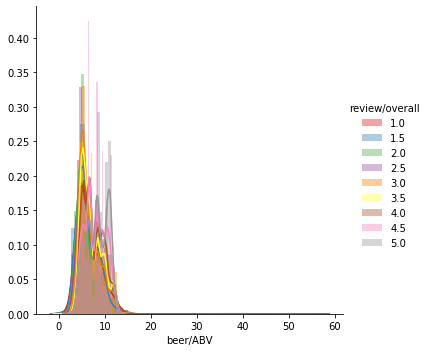

In [10]:
sns.FacetGrid(data, hue="review/overall", size=5 , palette="Set1") \
   .map(sns.distplot, "beer/ABV") \
   .add_legend()
plt.show()

## Key take-away :
* Most of the beer have alcohol-by-volume < 10 % , only very few above 10 % 
* Very much overlapping data
* Alone ABV not a good parameter

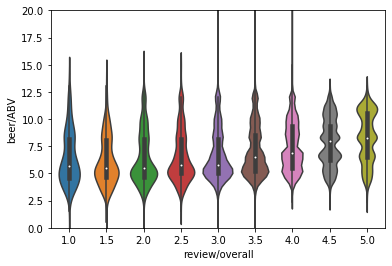

In [11]:
sns.violinplot(x="review/overall", y="beer/ABV", data=data, size=8)
plt.ylim(0,20)
plt.show()

## Key take-away :
* Useful plot
* For lower ratings - beer/ABV value is less
* For higher ratings - beer/ABV value is more
* <b> Therefore peaople generally  like beer with more alcohol content as compare to beer with less alcohol content </b>

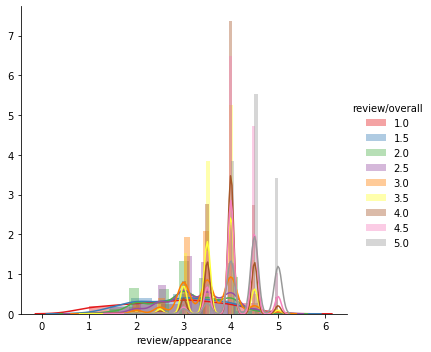

In [12]:
sns.FacetGrid(data, hue="review/overall", size=5 , palette="Set1") \
   .map(sns.distplot, "review/appearance") \
   .add_legend()
plt.show()

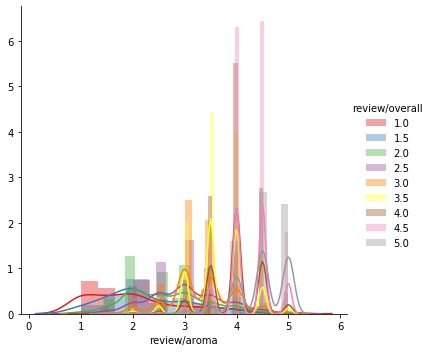

In [13]:
sns.FacetGrid(data, hue="review/overall", size=5 , palette="Set1") \
   .map(sns.distplot, "review/aroma") \
   .add_legend()
plt.show()

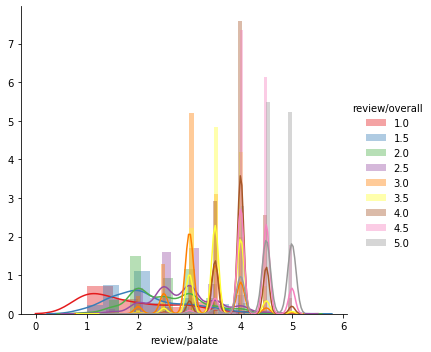

In [14]:
sns.FacetGrid(data, hue="review/overall", size=5 , palette="Set1") \
   .map(sns.distplot, "review/palate") \
   .add_legend()
plt.show()

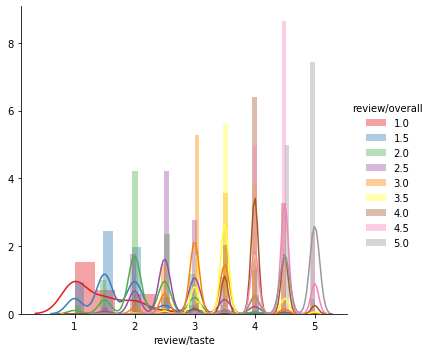

In [15]:
sns.FacetGrid(data, hue="review/overall", size=5 , palette="Set1") \
   .map(sns.distplot, "review/taste") \
   .add_legend()
plt.show()

# Key take-away :
* From all four plots above, it shows all feature are important in classification of beer rating.
* We observe peeks at every interval of 0.5 of x-axis in above plots, shows data linearly correlated with dependent variable too

* <b> But from all four factors analysed above - ""review/taste"" performs best as alone it is sufficient to separate dependent categories from one another</b>
* Hence taste can be important in classifying beer rating

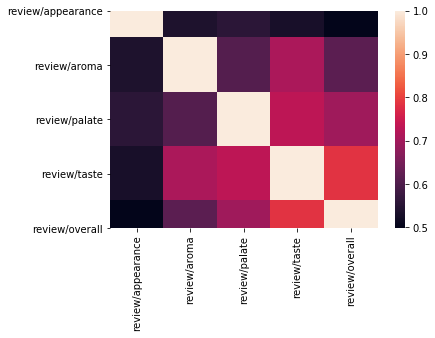

In [16]:
corr_data = data[['review/appearance', 'review/aroma', 'review/palate',
       'review/taste','review/overall']]
corr_data = corr_data.corr()
ax = sns.heatmap(corr_data)

### Even above heatmap clears that all four features are correlated with review/overall but review/taste is highly correlates

### Introducing - AVG column : (AVG score of appearance,aroma, palate, taste)

In [17]:
data['review/average'] = (data['review/appearance'] + data['review/aroma'] + data['review/palate'] + data['review/taste'])/4

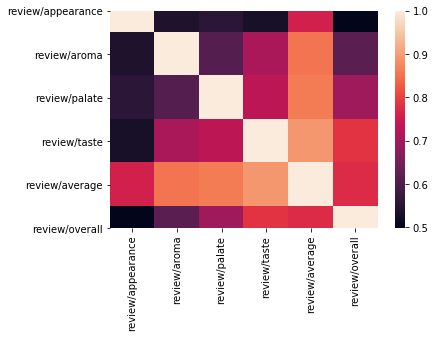

In [18]:
corr_data = data[['review/appearance', 'review/aroma', 'review/palate',
       'review/taste','review/average','review/overall']]
corr_data = corr_data.corr()
ax = sns.heatmap(corr_data)

### As Avg column also highly correlates so we can use avg column in model building rather than using four different columns 

## Separating Independent & Dependent variables 
### Splitting train, test, cross-validation data 

In [39]:
y_true = data['review/overall'].values

# Level  1 split - gives test set
X_train, test_df, y_train, y_test = train_test_split(data, y_true, test_size=0.2)

# Level  2 split - gives train set & cv set
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2)

In [40]:
### Number of entries in all three data

print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 23989
Number of data points in test data: 7497
Number of data points in cross validation data: 5998


## Veryfying if distrbution of all different classes in datasets(train, test, cv) are same or not

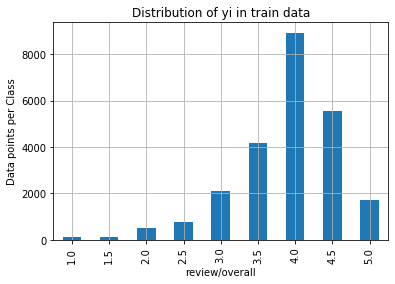

Number of data points in class 7 : 8921 ( 37.188 %)
Number of data points in class 8 : 5533 ( 23.065 %)
Number of data points in class 6 : 4165 ( 17.362 %)
Number of data points in class 5 : 2095 ( 8.733 %)
Number of data points in class 9 : 1726 ( 7.195 %)
Number of data points in class 4 : 779 ( 3.247 %)
Number of data points in class 3 : 526 ( 2.193 %)
Number of data points in class 2 : 137 ( 0.571 %)
Number of data points in class 1 : 107 ( 0.446 %)
--------------------------------------------------------------------------------


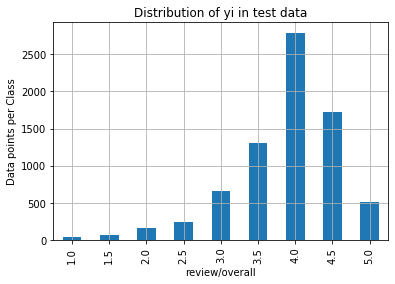

Number of data points in class 7 : 2791 ( 37.228 %)
Number of data points in class 8 : 1723 ( 22.983 %)
Number of data points in class 6 : 1303 ( 17.38 %)
Number of data points in class 5 : 664 ( 8.857 %)
Number of data points in class 9 : 507 ( 6.763 %)
Number of data points in class 4 : 244 ( 3.255 %)
Number of data points in class 3 : 162 ( 2.161 %)
Number of data points in class 2 : 62 ( 0.827 %)
Number of data points in class 1 : 41 ( 0.547 %)
--------------------------------------------------------------------------------


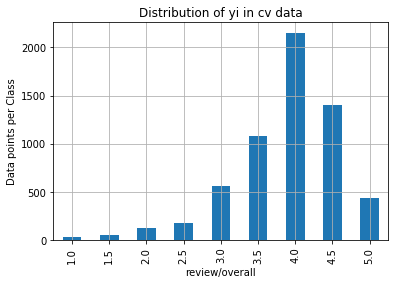

Number of data points in class 7 : 2153 ( 35.895 %)
Number of data points in class 8 : 1405 ( 23.424 %)
Number of data points in class 6 : 1082 ( 18.039 %)
Number of data points in class 5 : 560 ( 9.336 %)
Number of data points in class 9 : 432 ( 7.202 %)
Number of data points in class 4 : 170 ( 2.834 %)
Number of data points in class 3 : 119 ( 1.984 %)
Number of data points in class 2 : 49 ( 0.817 %)
Number of data points in class 1 : 28 ( 0.467 %)
--------------------------------------------------------------------------------


In [41]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['review/overall'].value_counts().sort_index()
test_class_distribution = test_df['review/overall'].value_counts().sort_index()
cv_class_distribution = cv_df['review/overall'].value_counts().sort_index()
count = 0
for data in [train_class_distribution , test_class_distribution , cv_class_distribution]:
    
    label = ['train', 'test', 'cv']
    
    data_set = [train_df, test_df, cv_df]
    
    my_colors = 'rgbkymc'
    data.plot(kind='bar')
    plt.xlabel('review/overall')
    plt.ylabel('Data points per Class')
#     plt.yticks(['1','1.5','2','2.5','3','3.5','4','4.5','5'])
    plt.title('Distribution of yi in ' + label[count] + ' data')
    plt.grid()
    plt.show()
    
    
    sorted_yi = np.argsort(-data.values)
    for i in sorted_yi:
        print('Number of data points in class', i+1, ':',data.values[i], '(', np.round((data.values[i]/data_set[count].shape[0]*100), 3), '%)')

    count += 1
     
    print('-'*80)



## Remapping labels to a different range i.e. to 1-9 scale just for the sake of future code where we want label as integral values in end we can re-map to original
#### Since this is classification task relabelling label sholud not cause any issue.

In [42]:
changingLabel = {1:1,1.5:2,
                     2:3, 2.5:4,
                         3:5,3.5:6,4:7,4.5:8,5:9}


In [43]:
y_t = pd.DataFrame(y_train, columns = ['label'])
y_t['label'] =  y_t['label'].map(changingLabel)
y_train = np.array(y_t['label'])

y_t = pd.DataFrame(y_test, columns = ['label'])
y_t['label'] =  y_t['label'].map(changingLabel)
y_test = np.array(y_t['label'])

y_t = pd.DataFrame(y_cv, columns = ['label'])
y_t['label'] =  y_t['label'].map(changingLabel)
y_cv = np.array(y_t['label'])

In [45]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))

    labels = [1,1.5,2,2.5,3,3.5,4,4.5,5]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# Random Model :
- <b> What is random model ?</b>
* A random model try to generate value of used KPI's on any randomly generated Y_predict
- <b>Need of random model ?</b>
* For KPI's such as accuracy we know that its value lies between 0 to 100, i.e. we have both lower and upper bound, but when using log-loss type of KPI we best loss value as 0 but don't know worst value so to know how good or bad our model as per lower and upper bound of KPI its useful to calculate KPI value on random model as it will generate worst value and hence provides a bound

Log loss on Cross Validation Data using Random Model 2.482479311065225
Log loss on Test Data using Random Model 2.4755754652187445
-------------------- Confusion matrix --------------------


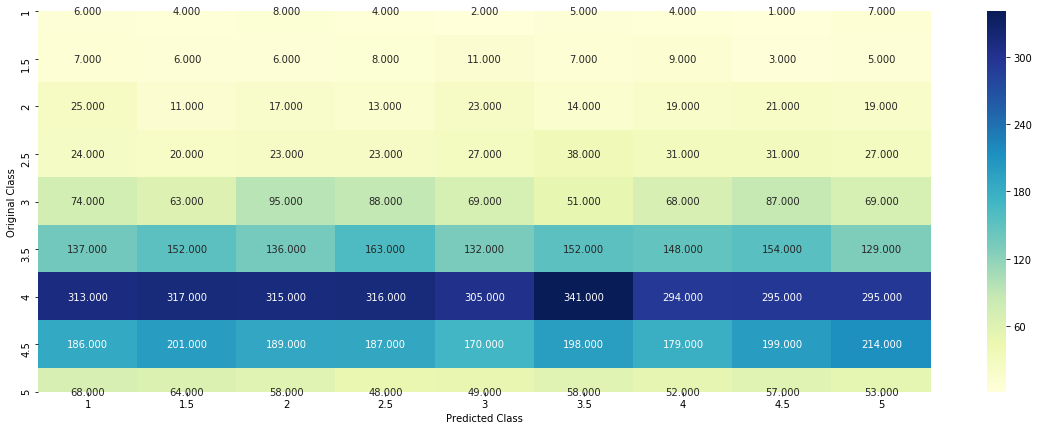

-------------------- Precision matrix (Columm Sum=1) --------------------


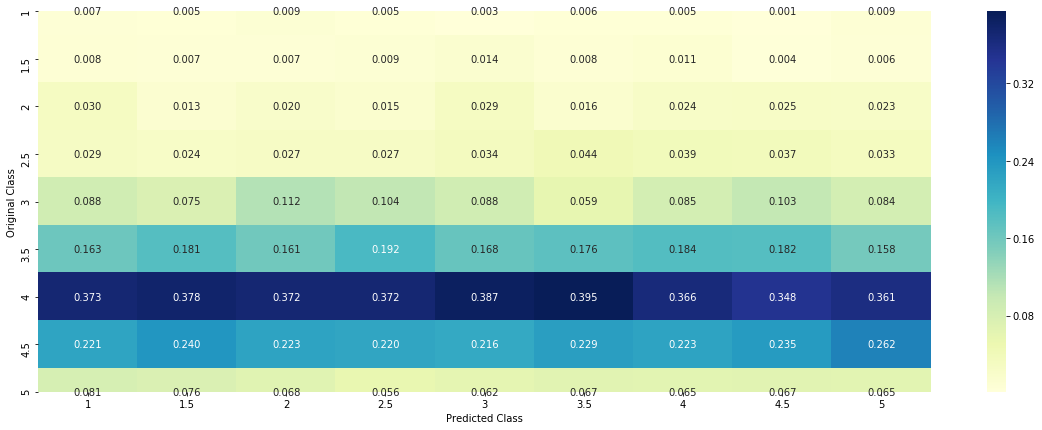

-------------------- Recall matrix (Row sum=1) --------------------


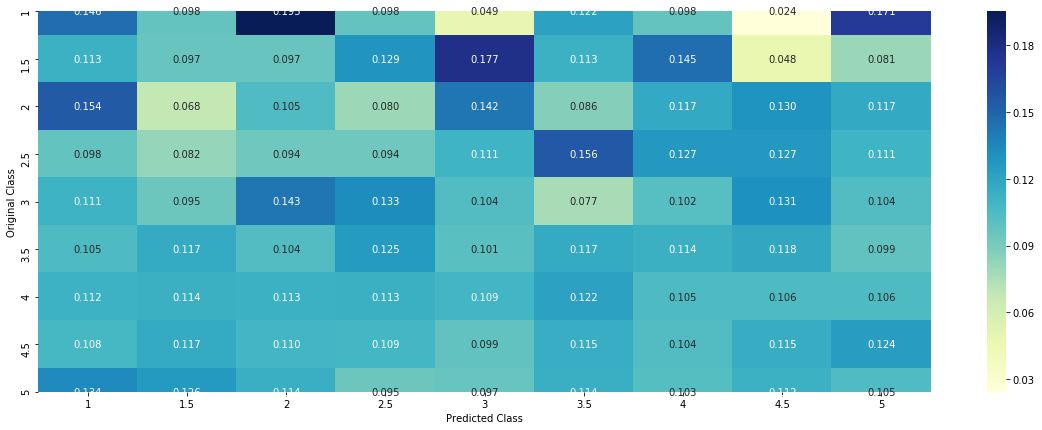

In [46]:

test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

## Worst value for Log-loss :
- Log loss on Cross Validation Data using Random Model 2.4747067464769454
- Log loss on Test Data using Random Model 2.478895218897431

# Univariate analysis of other features
## Checking how features predict class label individually

### beer/name

In [47]:
# EDA - beer/name

unique_name = train_df['beer/name'].value_counts()
print('Number of Unique Names :', unique_name.shape[0])
# the top 10 genes that occured most
print(unique_name.head(10))

Number of Unique Names : 1421
Founders Breakfast Stout                   1192
Founders KBS (Kentucky Breakfast Stout)     920
Founders Centennial IPA                     687
Founders Red's Rye PA                       679
Pilsner Urquell                             614
Founders Dirty Bastard                      613
Founders Double Trouble                     549
Founders Devil Dancer                       519
Founders Imperial Stout                     511
Founders Backwoods Bastard                  496
Name: beer/name, dtype: int64


In [48]:
print("Ans: There are", unique_name.shape[0] ,"different names of beer in the train data, and they are distibuted as follows",)

Ans: There are 1421 different names of beer in the train data, and they are distibuted as follows


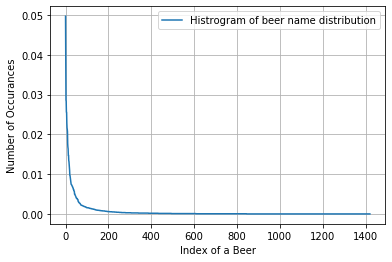

In [49]:
s = sum(unique_name.values);
h = unique_name.values/s;
plt.plot(h, label="Histrogram of beer name distribution")
plt.xlabel('Index of a Beer')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()



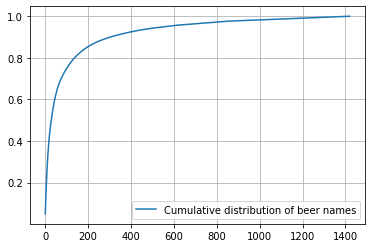

In [50]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of beer names')
plt.grid()
plt.legend()
plt.show()

### Shows only about 200 beer names covered almost 85 % of total data, 


# one-hot encoding of beer/name

In [52]:

enc = OneHotEncoder(handle_unknown='ignore')

train_name_feature_onehotCoding = enc.fit_transform((np.array(train_df['beer/name']).reshape(-1,1)))
test_name_feature_onehotCoding = enc.transform((np.array(test_df['beer/name']).reshape(-1,1)))
cv_name_feature_onehotCoding = enc.transform((np.array(cv_df['beer/name']).reshape(-1,1)))


In [53]:
train_name_feature_onehotCoding.shape, test_name_feature_onehotCoding.shape, cv_name_feature_onehotCoding.shape

((23989, 1421), (7497, 1421), (5998, 1421))

## Veryfing how beer/name works alone in predicting class label

For values of alpha =  1e-05 The log loss is: 1.562086779385275
For values of alpha =  0.0001 The log loss is: 1.5521515902628287
For values of alpha =  0.001 The log loss is: 1.5670787125504761
For values of alpha =  0.01 The log loss is: 1.5914558831410857
For values of alpha =  0.1 The log loss is: 1.6178958262919976
For values of alpha =  1 The log loss is: 1.6189233055508014


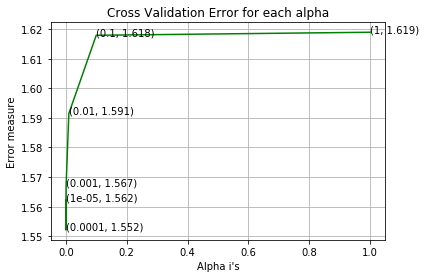

For values of best alpha =  0.0001 The train log loss is: 1.4868712422323045
For values of best alpha =  0.0001 The cross validation log loss is: 1.5521515902628287
For values of best alpha =  0.0001 The test log loss is: 1.5464216789769805


In [78]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_name_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_name_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_name_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_name_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_name_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_name_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_name_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_name_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Log loss by random model ~ 2.5
### Log loss by name/beer data ~ 1.54
### hence feature is important

In [55]:
print("No of data points in Test and CV datasets are covered by the ", unique_name.shape[0], " genes in train dataset")

test_coverage=test_df[test_df['beer/name'].isin(list(set(train_df['beer/name'])))].shape[0]
cv_coverage=cv_df[cv_df['beer/name'].isin(list(set(train_df['beer/name'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

No of data points in Test and CV datasets are covered by the  1421  genes in train dataset
Ans
1. In test data 7320 out of 7497 : 97.6390556222489
2. In cross validation data 5851 out of  5998 : 97.54918306102034


## beer/style

In [56]:
unique_style = train_df['beer/style'].value_counts()
print('Number of Unique style :', unique_style.shape[0])
# the top 10 variations that occured most
print(unique_style.head(10))

Number of Unique style : 95
American Double / Imperial Stout    2864
American IPA                        1959
American Double / Imperial IPA      1853
Scotch Ale / Wee Heavy              1356
Russian Imperial Stout              1292
American Pale Ale (APA)             1086
American Porter                     1072
Rauchbier                            938
Rye Beer                             877
Czech Pilsener                       732
Name: beer/style, dtype: int64


In [57]:
print("Ans: There are", unique_style.shape[0] ,"different categories of style of beer in the train data, and they are distibuted as follows",)

Ans: There are 95 different categories of style of beer in the train data, and they are distibuted as follows


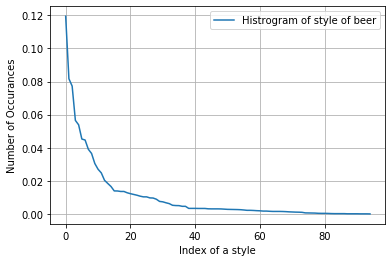

In [58]:
s = sum(unique_style.values);
h = unique_style.values/s;
plt.plot(h, label="Histrogram of style of beer")
plt.xlabel('Index of a style')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

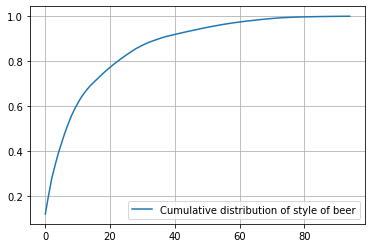

In [59]:
c = np.cumsum(h)
# print(c)
plt.plot(c,label='Cumulative distribution of style of beer')
plt.grid()
plt.legend()
plt.show()

## ONe Hot Encoding On beer/style

In [60]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

train_style_feature_onehotCoding = enc.fit_transform((np.array(train_df['beer/style']).reshape(-1,1)))
test_style_feature_onehotCoding = enc.transform((np.array(test_df['beer/style']).reshape(-1,1)))
cv_style_feature_onehotCoding = enc.transform((np.array(cv_df['beer/style']).reshape(-1,1)))


In [61]:
print("train_style_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of style feature:", train_style_feature_onehotCoding.shape)

train_style_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of style feature: (23989, 95)


## Veryfing how beer/style works alone in predicting class label

For values of alpha =  1e-05 The log loss is: 1.5804909180561417
For values of alpha =  0.0001 The log loss is: 1.5766932890573744
For values of alpha =  0.001 The log loss is: 1.5857826638574815
For values of alpha =  0.01 The log loss is: 1.6099090143553019
For values of alpha =  0.1 The log loss is: 1.6301498427772023
For values of alpha =  1 The log loss is: 1.6301952946286415


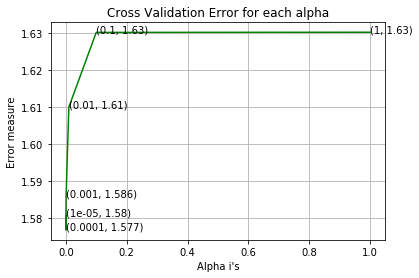

For values of best alpha =  0.0001 The train log loss is: 1.5507900908987908
For values of best alpha =  0.0001 The cross validation log loss is: 1.5766932890573744
For values of best alpha =  0.0001 The test log loss is: 1.5769194265311892


In [62]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_style_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_style_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_style_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_style_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_style_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_style_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_style_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_style_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Log loss by random model ~ 2.5
### Log loss by beer/style data ~ 1.57
### hence feature is important

## review/text

In [64]:
## Data preprocessing - Removing HTML, Punctuation, Stopwords etc

In [63]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])


# Combining all the above stundents 
from tqdm import tqdm_notebook as tqdm
preprocessed_reviews_train = []
# tqdm is for printing the status bar
for sentance in tqdm(train_df['review/text']):
    try:
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        preprocessed_reviews_train.append(sentance.strip())
    except:
        preprocessed_reviews_train.append(' ')

In [65]:
preprocessed_reviews_test = []
# tqdm is for printing the status bar
for sentance in tqdm(test_df['review/text']):
    try:
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        preprocessed_reviews_test.append(sentance.strip())
    except:
        preprocessed_reviews_test.append(' ')
        
preprocessed_reviews_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(cv_df['review/text']):
    try:
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        preprocessed_reviews_cv.append(sentance.strip())
    except:
        preprocessed_reviews_cv.append(' ')

## Vectorization using TF-IDF 

In [66]:
text_vectorizer = TfidfVectorizer(max_features = 2000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(preprocessed_reviews_train)
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 2000


In [67]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['review/text'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['review/text'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [68]:
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [69]:
# Verifying ...

For values of alpha =  1e-05 The log loss is: 1.4513594457981016
For values of alpha =  0.0001 The log loss is: 1.4648856515210529
For values of alpha =  0.001 The log loss is: 1.5789170806959498
For values of alpha =  0.01 The log loss is: 1.7220518509060616
For values of alpha =  0.1 The log loss is: 1.7310375890206116
For values of alpha =  1 The log loss is: 1.7600718215724582


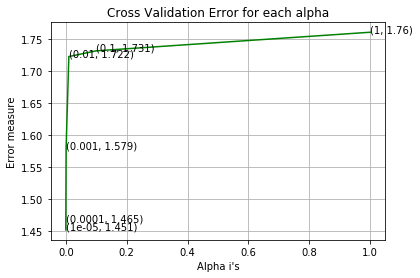

For values of best alpha =  1e-05 The train log loss is: 1.254081147465337
For values of best alpha =  1e-05 The cross validation log loss is: 1.4513594457981016
For values of best alpha =  1e-05 The test log loss is: 1.415776423548539


In [98]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Log loss by random model ~ 2.5
### Log loss by name/beer data ~ 1.45
### hence feature is important

In [70]:
def get_intersec_text(df):
    df_text_vec = TfidfVectorizer(max_features=1000)
    df_text_fea = df_text_vec.fit_transform(df['review/text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [71]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

87.9 % of word of test data appeared in train data
88.0 % of word of Cross Validation appeared in train data


# Words Responsible for strongly predicting the overall rating of the beer 

In [72]:
#model #We can use Simple LR model to get polarity of weights using its coffiecient values . . . .
clf_fi = LogisticRegression( )
clf_fi.fit(train_text_feature_onehotCoding, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# to get important words and corresponding cofficients. . . 


feature_weight = clf_fi.coef_[1, :].argsort()


#feature importance top 20 words in corpus for positive class 

pos_imp_words = np.take(text_vectorizer.get_feature_names(), feature_weight[:20])
pos_imp_prob = np.take((clf_fi.coef_), feature_weight[:20])


#feature importance top 20 words in corpus for negative class 

neg_imp_words = np.take(text_vectorizer.get_feature_names(), feature_weight[-20:])
neg_imp_prob = np.take((clf_fi.coef_), feature_weight[-20:])

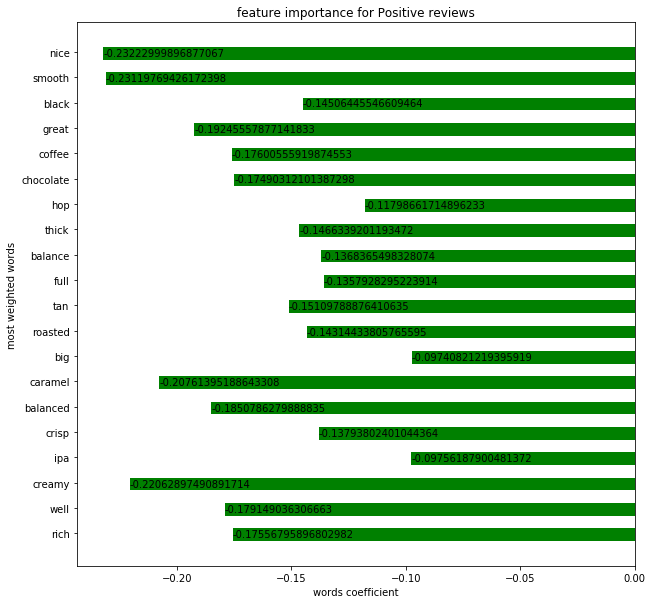

In [74]:
#for positive reviews 

x = list(pos_imp_words) # important words 
y = [x for x in pos_imp_prob ] #cofficients of important words 
x.reverse() # to plot in decreasing order
y.reverse()
fig, ax = plt.subplots()    
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)

for i, v in enumerate(y): 
    ax.text(v, i-0.1 , str(v))
    
ax.set_yticklabels(x, minor=False)

plt.title('feature importance for Positive reviews')
plt.xlabel('words coefficient')
plt.ylabel('most weighted words')  

fig.set_size_inches(10, 10, forward=True)
plt.show()

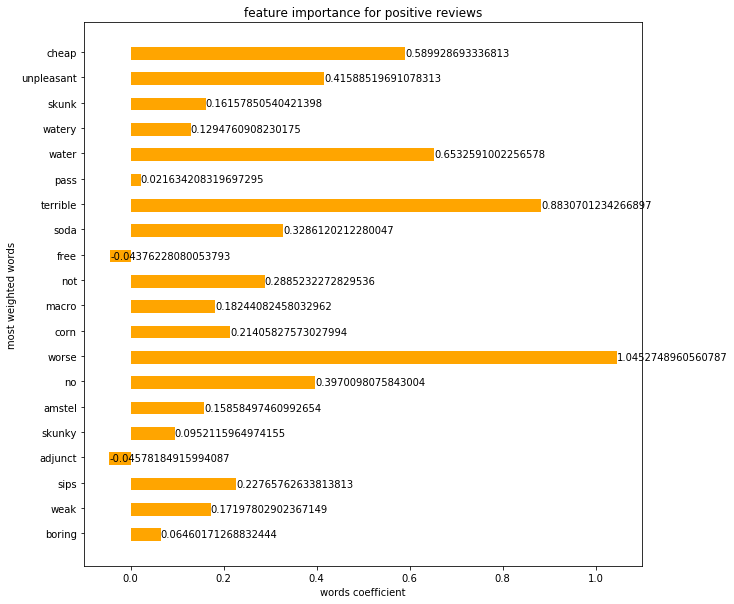

In [75]:
#for negative reviews 

x = neg_imp_words # important words 
y = [x for x in neg_imp_prob ] #cofficients of important words 

fig, ax = plt.subplots()    
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="orange")
ax.set_yticks(ind+width/10)

for i, v in enumerate(y): 
    ax.text(v, i-0.1 , str(v))
    
ax.set_yticklabels(x, minor=False)

plt.title('feature importance for positive reviews')
plt.xlabel('words coefficient')
plt.ylabel('most weighted words')  

fig.set_size_inches(10, 10, forward=True)
plt.show()

# beer/ABV

In [76]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='uniform')

train_abv_feature_onehotCoding = est.fit_transform((np.array(train_df['beer/ABV']).reshape(-1,1)))
test_abv_feature_onehotCoding = est.transform((np.array(test_df['beer/ABV']).reshape(-1,1)))
cv_abv_feature_onehotCoding = est.transform((np.array(cv_df['beer/ABV']).reshape(-1,1)))


In [77]:
est.bin_edges_

array([array([ 0.5       ,  5.26666667, 10.03333333, 14.8       , 19.56666667,
       24.33333333, 29.1       , 33.86666667, 38.63333333, 43.4       ,
       48.16666667, 52.93333333, 57.7       ])], dtype=object)

# appearance, aroma , palate , taste

In [78]:

train_avg_feature_onehotCoding = (train_df['review/appearance'] + train_df['review/aroma'] + train_df['review/palate'] + train_df['review/taste'])/4
test_avg_feature_onehotCoding = (test_df['review/appearance'] + test_df['review/aroma'] + test_df['review/palate'] + test_df['review/taste'])/4
cv_avg_feature_onehotCoding = (cv_df['review/appearance'] + cv_df['review/aroma'] + cv_df['review/palate'] + cv_df['review/taste'])/4


In [113]:
# train_df['']

Index(['beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name', 'beer/style',
       'review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste', 'review/text', 'review/timeStruct', 'review/timeUnix',
       'user/profileName', 'review/average'],
      dtype='object')

In [79]:
import scipy

In [80]:

train_name_var_onehotCoding = hstack((train_name_feature_onehotCoding,train_style_feature_onehotCoding,train_text_feature_onehotCoding))
test_name_var_onehotCoding = hstack((test_name_feature_onehotCoding,test_style_feature_onehotCoding,test_text_feature_onehotCoding))
cv_name_var_onehotCoding = hstack((cv_name_feature_onehotCoding,cv_style_feature_onehotCoding,cv_text_feature_onehotCoding))


train_x_onehotCoding = scipy.sparse.hstack([train_name_var_onehotCoding,train_abv_feature_onehotCoding,(np.array(train_avg_feature_onehotCoding)).reshape(-1,1)])
test_x_onehotCoding = scipy.sparse.hstack([test_name_var_onehotCoding,test_abv_feature_onehotCoding,(np.array(test_avg_feature_onehotCoding)).reshape(-1,1)])
cv_x_onehotCoding = scipy.sparse.hstack([cv_name_var_onehotCoding,cv_abv_feature_onehotCoding,(np.array(cv_avg_feature_onehotCoding)).reshape(-1,1)])


train_y = np.array(list(train_df['review/overall']))

test_y = np.array(list(test_df['review/overall']))

cv_y = np.array(list(cv_df['review/overall']))




In [81]:
changingLabel = {1:1,1.5:2,
                     2:3, 2.5:4,
                         3:5,3.5:6,4:7,4.5:8,5:9}

train_df['review/overall'] =  train_df['review/overall'].map(changingLabel)
test_df['review/overall'] =  test_df['review/overall'].map(changingLabel)
cv_df['review/overall'] =  cv_df['review/overall'].map(changingLabel)

train_y = np.array(list(train_df['review/overall']))

test_y = np.array(list(test_df['review/overall']))

cv_y = np.array(list(cv_df['review/overall']))

In [82]:
train_x_onehotCoding.shape, test_x_onehotCoding.shape , cv_x_onehotCoding.shape

((23989, 3518), (7497, 3518), (5998, 3518))

In [83]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (23989, 3518)
(number of data points * number of features) in test data =  (7497, 3518)
(number of data points * number of features) in cross validation data = (5998, 3518)


In [84]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)
    
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

# ML model Implementation

## Naive Bayes :


for alpha = 1e-05
Log Loss : 1.5726791517315843
for alpha = 0.0001
Log Loss : 1.5711764650284412
for alpha = 0.001
Log Loss : 1.5686271669538283
for alpha = 0.1
Log Loss : 1.5547179430839269
for alpha = 1
Log Loss : 1.5455244695574177
for alpha = 10
Log Loss : 1.6116955588216368
for alpha = 100
Log Loss : 1.6108222359663311
for alpha = 1000
Log Loss : 1.5475786239601135


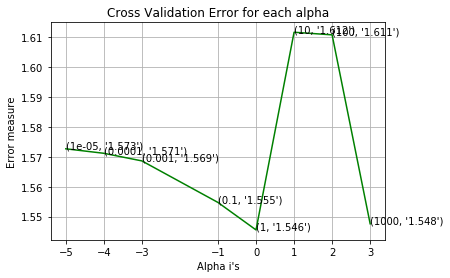

For values of best alpha =  1 The train log loss is: 1.4905224105641957
For values of best alpha =  1 The cross validation log loss is: 1.5455244695574177
For values of best alpha =  1 The test log loss is: 1.5406720551457265


In [116]:
# hyper-parameter tuning -
## Hyper-parameter in Naive Bayes : alpha 
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000] # values of alpha tested . . .
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Calculating log-loss, generating confusion matrix , number of missclassified points using best value of hyper-paramter   

Log Loss : 1.5455244695574177
Number of missclassified point : 0.6092030676892297
-------------------- Confusion matrix --------------------


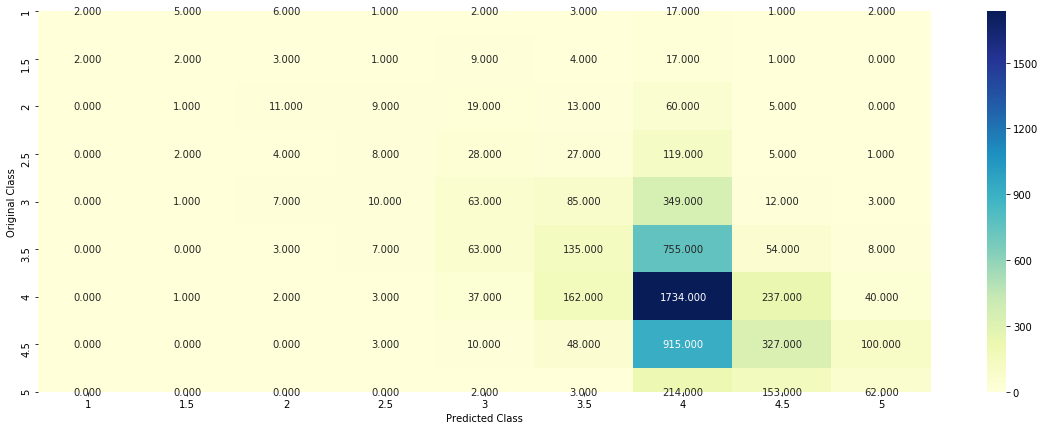

-------------------- Precision matrix (Columm Sum=1) --------------------


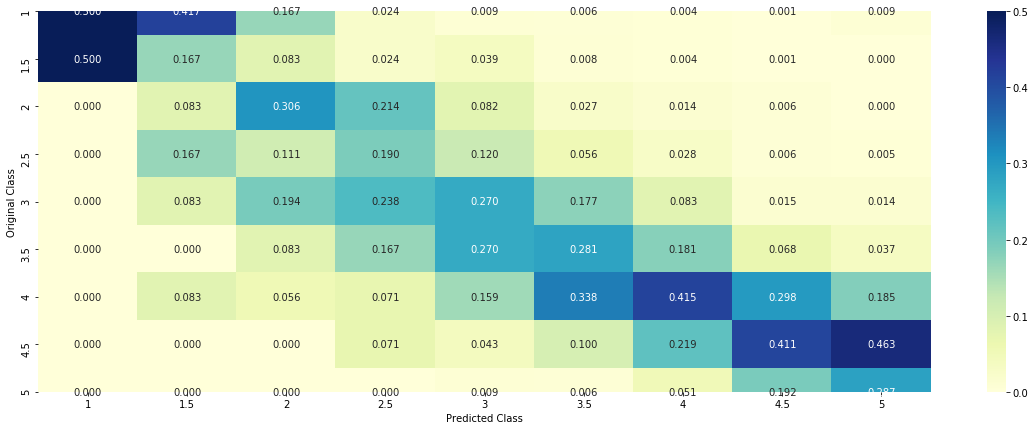

-------------------- Recall matrix (Row sum=1) --------------------


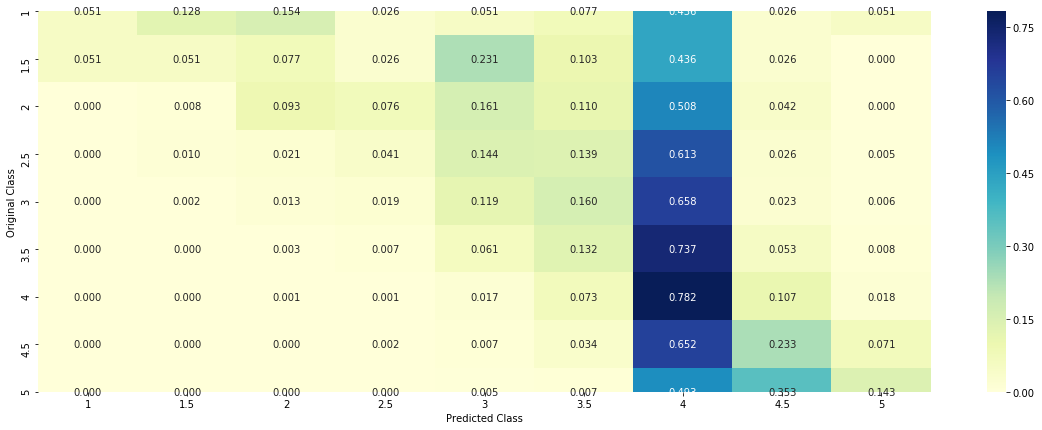

In [117]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

## Logistic Regression - With balanced class weights

for alpha = 1e-06
Log Loss : 1.3995117470701837
for alpha = 1e-05
Log Loss : 1.309478757396107
for alpha = 0.0001
Log Loss : 1.3416872413079248
for alpha = 0.001
Log Loss : 1.4622521523738814
for alpha = 0.01
Log Loss : 1.4822837338652723
for alpha = 0.1
Log Loss : 1.3853459975313267
for alpha = 1
Log Loss : 1.3542648323017736
for alpha = 10
Log Loss : 1.3594173642969825
for alpha = 100
Log Loss : 1.3603018702855847


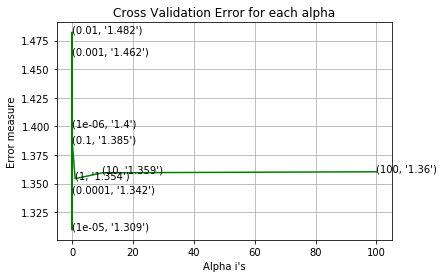

For values of best alpha =  1e-05 The train log loss is: 1.1664524003088388
For values of best alpha =  1e-05 The cross validation log loss is: 1.309478757396107
For values of best alpha =  1e-05 The test log loss is: 1.3097265334405328


In [119]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.309478757396107
Number of mis-classified points : 0.5561853951317106
-------------------- Confusion matrix --------------------


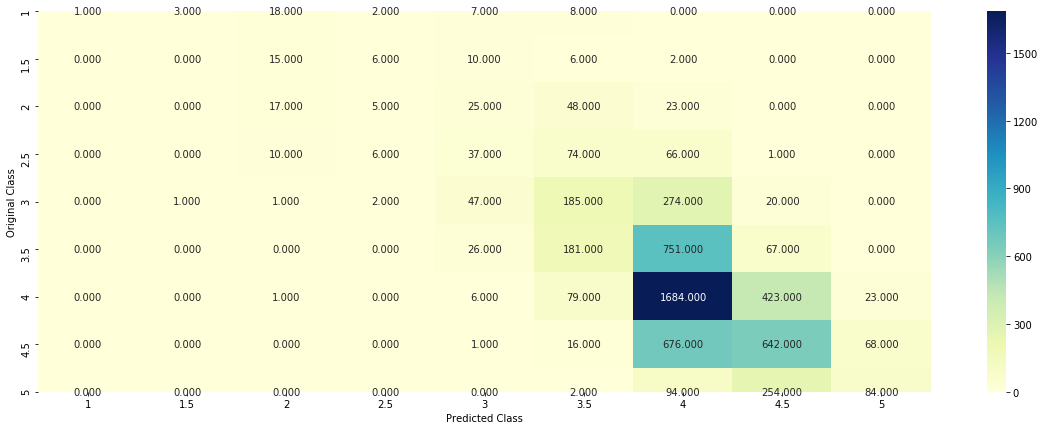

-------------------- Precision matrix (Columm Sum=1) --------------------


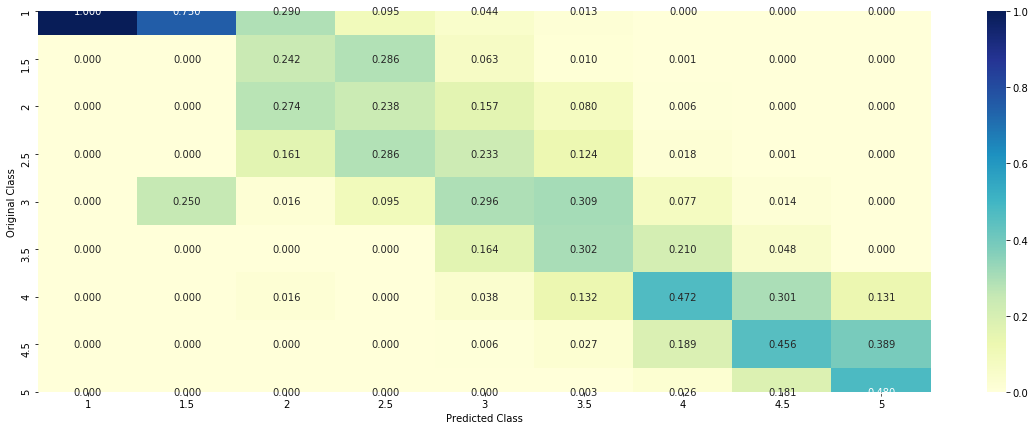

-------------------- Recall matrix (Row sum=1) --------------------


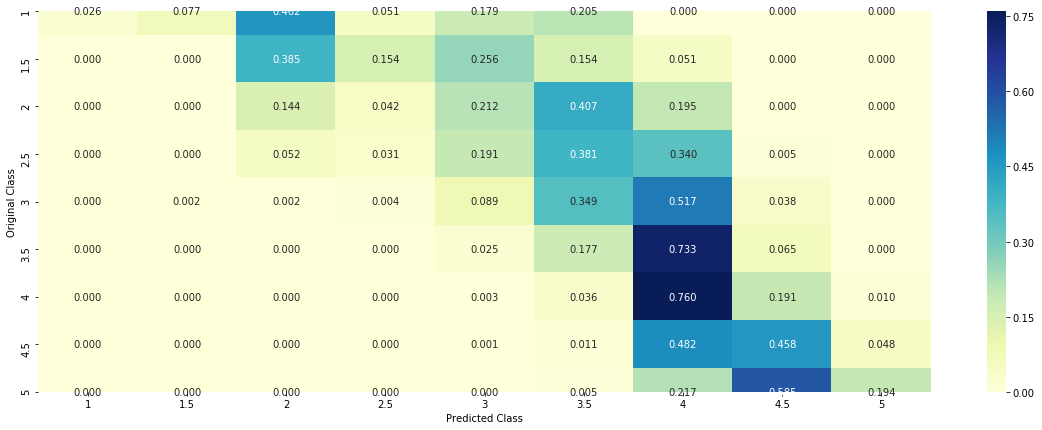

In [121]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

## Logistic Regression - Without balancing class weights

for alpha = 1e-06
Log Loss : 1.4007454576253302
for alpha = 1e-05
Log Loss : 1.309876265830001
for alpha = 0.0001
Log Loss : 1.3397883940816309
for alpha = 0.001
Log Loss : 1.4403330526364275
for alpha = 0.01
Log Loss : 1.4653792059659272
for alpha = 0.1
Log Loss : 1.3965147751909777
for alpha = 1
Log Loss : 1.3543099888809356


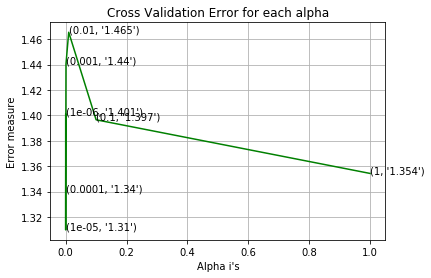

For values of best alpha =  1e-05 The train log loss is: 1.1547508782513407
For values of best alpha =  1e-05 The cross validation log loss is: 1.309876265830001
For values of best alpha =  1e-05 The test log loss is: 1.3074577386608408


In [122]:

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.309876265830001
Number of mis-classified points : 0.5585195065021674
-------------------- Confusion matrix --------------------


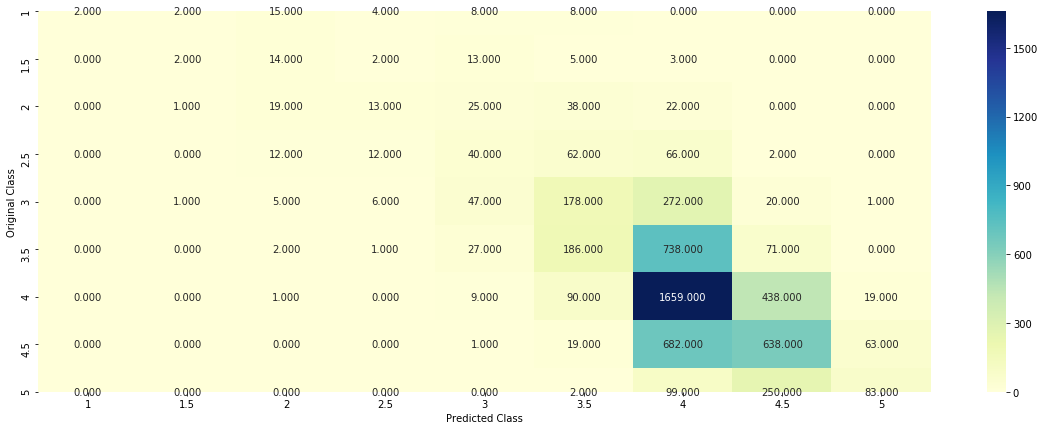

-------------------- Precision matrix (Columm Sum=1) --------------------


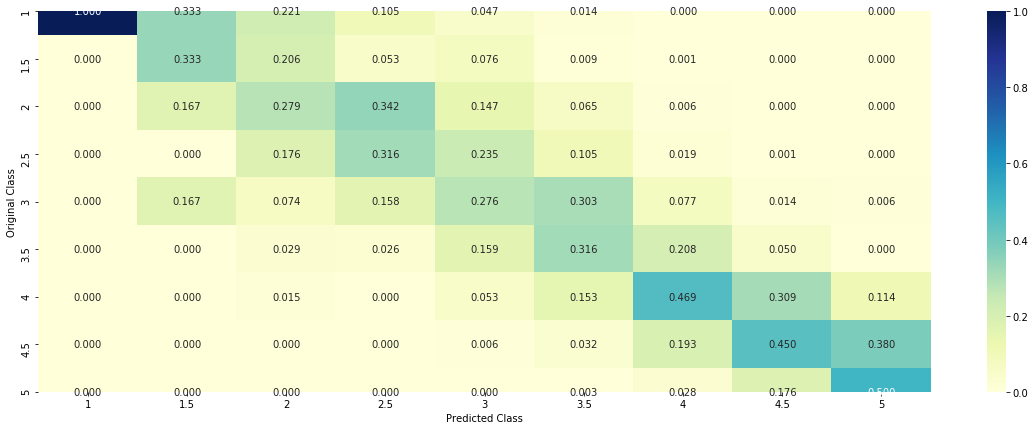

-------------------- Recall matrix (Row sum=1) --------------------


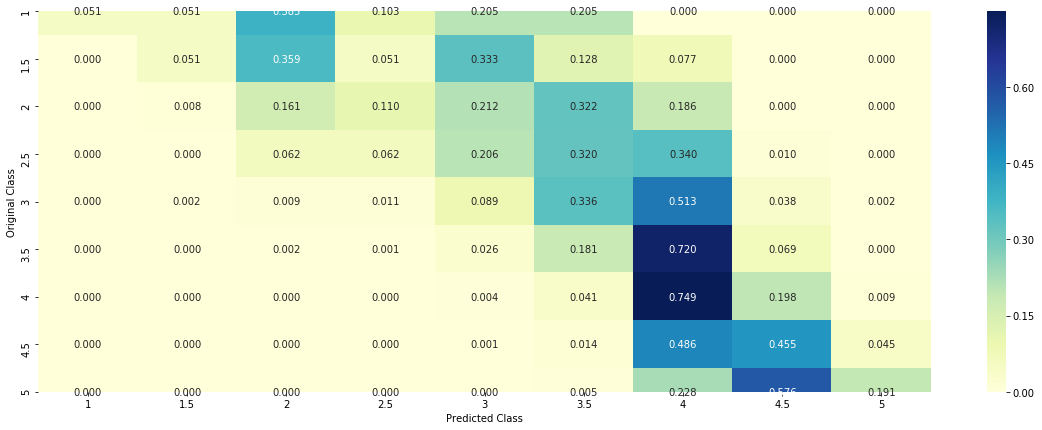

In [123]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

## Support Vector Classifier

for C = 1e-05
Log Loss : 1.3478936841944686
for C = 0.0001
Log Loss : 1.3335700594140518
for C = 0.001
Log Loss : 1.4417061874034311
for C = 0.01
Log Loss : 1.465983546205013
for C = 0.1
Log Loss : 1.3924349117089527
for C = 1
Log Loss : 1.3350306930070288
for C = 10
Log Loss : 1.3545035569681594
for C = 100
Log Loss : 1.3604068119577337


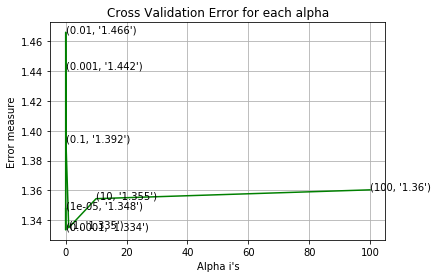

For values of best alpha =  0.0001 The train log loss is: 1.2227317878611799
For values of best alpha =  0.0001 The cross validation log loss is: 1.3335700594140518
For values of best alpha =  0.0001 The test log loss is: 1.3308561947017283


In [124]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.3335700594140518
Number of mis-classified points : 0.5701900633544514
-------------------- Confusion matrix --------------------


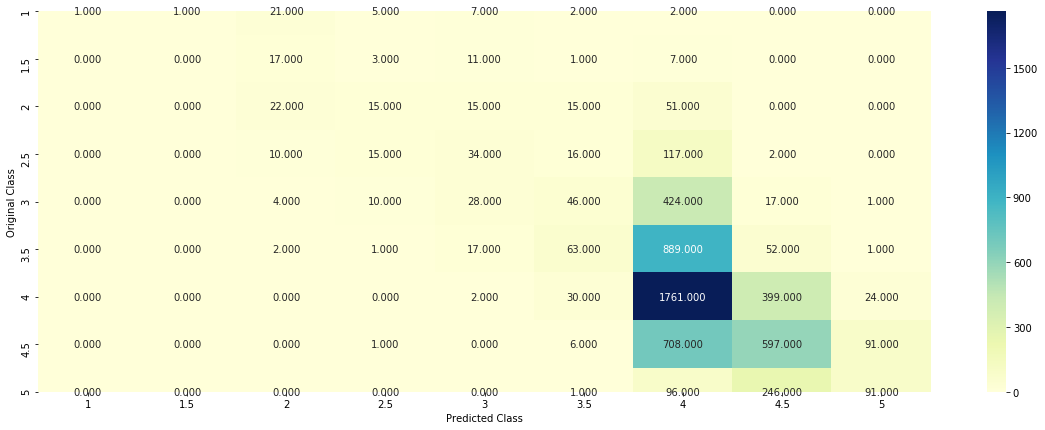

-------------------- Precision matrix (Columm Sum=1) --------------------


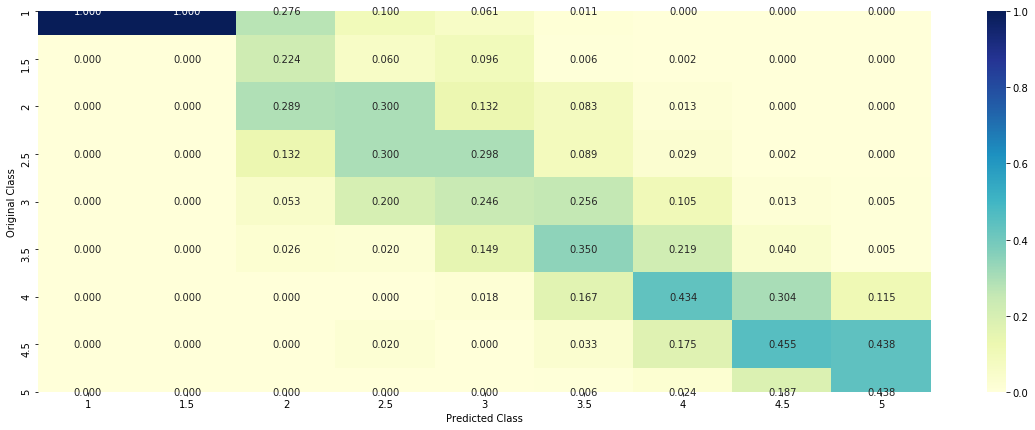

-------------------- Recall matrix (Row sum=1) --------------------


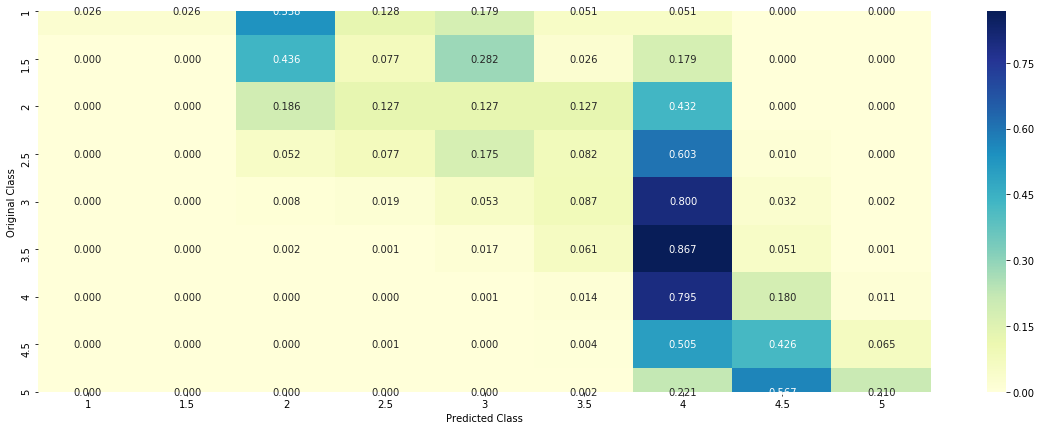

In [125]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [ ]:
# to get important words and corresponding cofficients. . . 


feature_weight = clf_fi.coef_[0, :].argsort()


#feature importance top 20 words in corpus for negative class 

neg_imp_words = np.take(count_vect.get_feature_names(), feature_weight[:20])
neg_imp_prob = np.take((clf_fi.coef_), feature_weight[:20])


#feature importance top 20 words in corpus for positive class 

pos_imp_words = np.take(count_vect.get_feature_names(), feature_weight[-20:])
pos_imp_prob = np.take((clf_fi.coef_), feature_weight[-20:])

## Dimensionality Reduction - Using SVD 
#### Specially used for models which work on less umber of features such as Random Forest , Decision tree

In [126]:
# initializing the pca

from sklearn import decomposition
from sklearn.decomposition import TruncatedSVD
pca = decomposition.PCA()
svd = TruncatedSVD(n_components=500, n_iter=7, random_state=42)
svd_train = svd.fit_transform(train_x_onehotCoding)
svd_test = svd.fit_transform(test_x_onehotCoding)
svd_cv = svd.fit_transform(cv_x_onehotCoding)
print((svd.explained_variance_ratio_).sum())

0.8977180498659737


In [127]:
alpha = [100,200,500,1000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(svd_train, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(svd_train, train_y)
        sig_clf_probs = sig_clf.predict_proba(svd_cv)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(svd_train, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(svd_train, train_y)

predict_y = sig_clf.predict_proba(svd_train)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svd_cv)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svd_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.621490228945345
for n_estimators = 100 and max depth =  10
Log Loss : 1.6021131821545513
for n_estimators = 200 and max depth =  5
Log Loss : 1.616849215568722
for n_estimators = 200 and max depth =  10


KeyboardInterrupt: 

In [ ]:

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [85]:
## Above code taking too much tym , halted before completion . .. .

# What's Next ...

1. <b>For beer/Name & beer/Style feature:</b>

1.1 Instead of One Hot Encoding we can use Response coding featurization method, where can create a matrix of No of rows X No of classes which contain probabilty of each name or style feature to present in respective classes.
1.2 For example : IF beer name "n" most of the time rated 4+ ,and very few time 4- then probability row for beer name "n" will contains max value corresponding to 4+ columns and less to 4- columns.

2. <b> For beer/text feature:</b>

2.1 Here we can try other feature engineering techniques also such as BOW, avgW2V, tf-idfW2V etc.
2.2. Try with different value for max_features, try with different no of dimension in W2V featurized data
2.3 Try N-grams

3. <b>For beer/ABV</b>

3.1 Try forming bins of alcohol percent manually with hyper-parameter as bin-width.

4. <b>For appearance, aroma , palate , taste feature:</b>

4.1 Try with different combination of these features
4.2 Also try beer/taste alone and dropping appearance, aroma , palate as beer/taste shows max correlation with beer/overall

<b>
5.1 Can use other feature importance methodology for reducing dimensionality.
    
5.2 Can use more powerful classifier such as voting classifier, cascading classifier, stacking classifier etc.

5.3 Can try Regression approach rather than classification 
</b>